In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Loading data
df = pd.read_csv('updated_passengers.csv')
df.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route,day_number
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China,2
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India,6
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India,6
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India,3
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India,6


In [28]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000,49280.000000
mean,1.590239,84.726623,23.055073,9.070617,0.668263,0.295657,0.426664,7.279958,0.150000
std,1.016561,90.411115,33.832448,5.413168,0.470842,0.456342,0.494598,1.496381,0.357075
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


# Maps

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_74009/2008510760.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


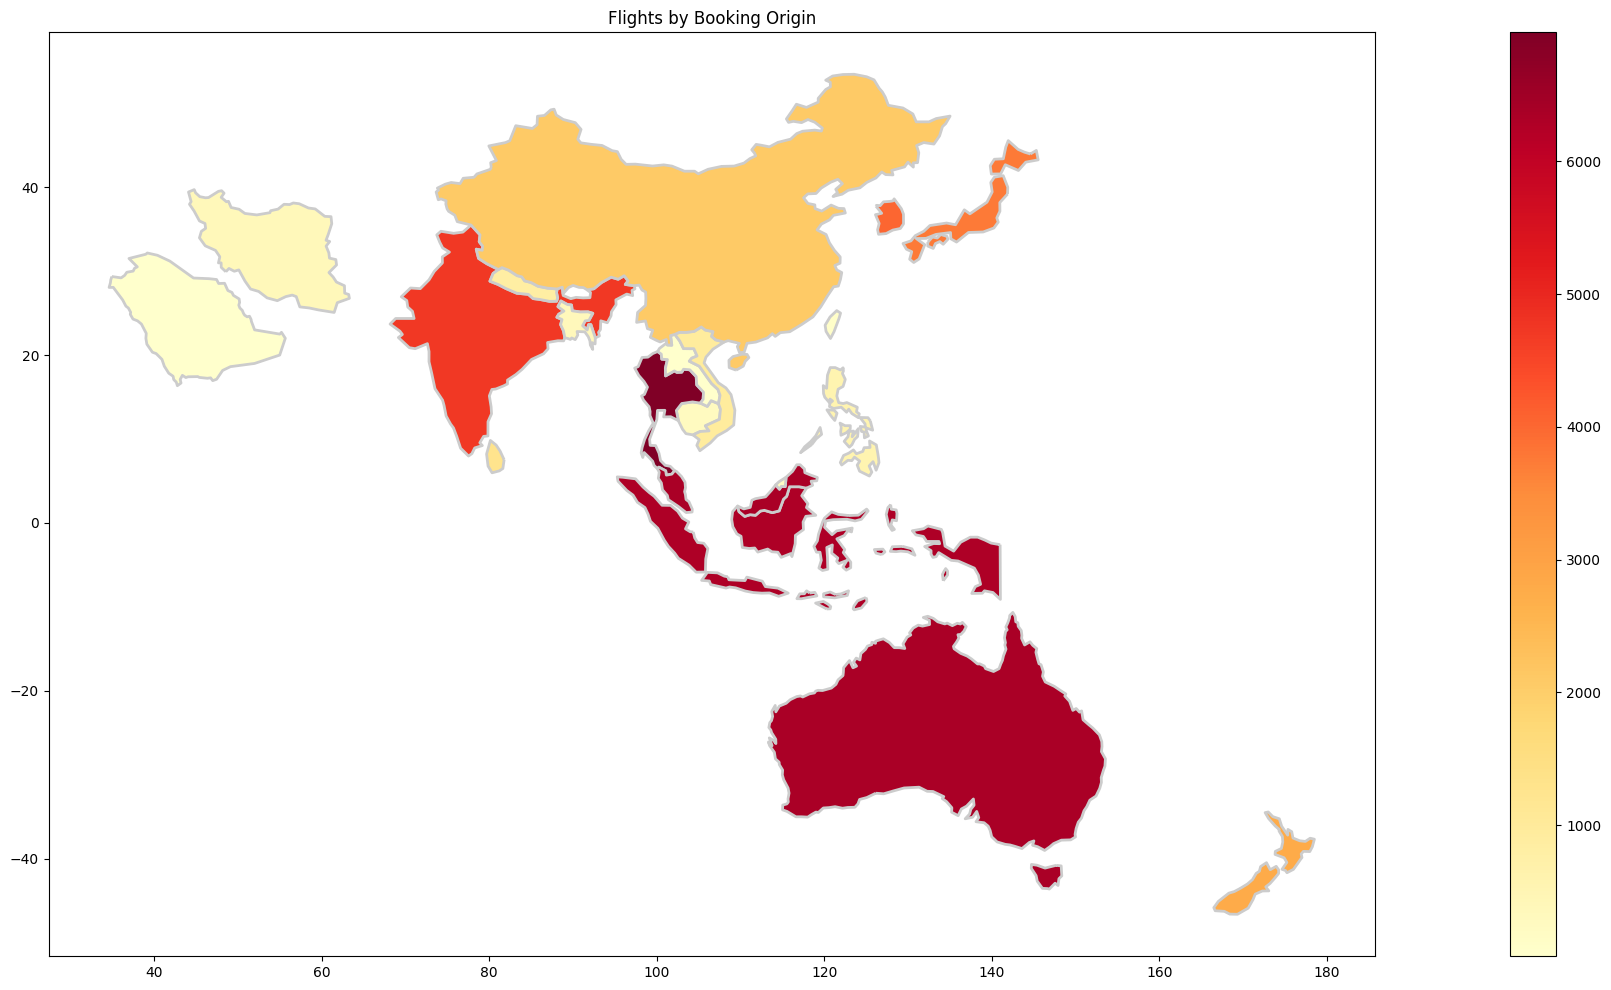

In [113]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_origin'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_origin', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Origin')

plt.show()

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_74009/3880249623.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


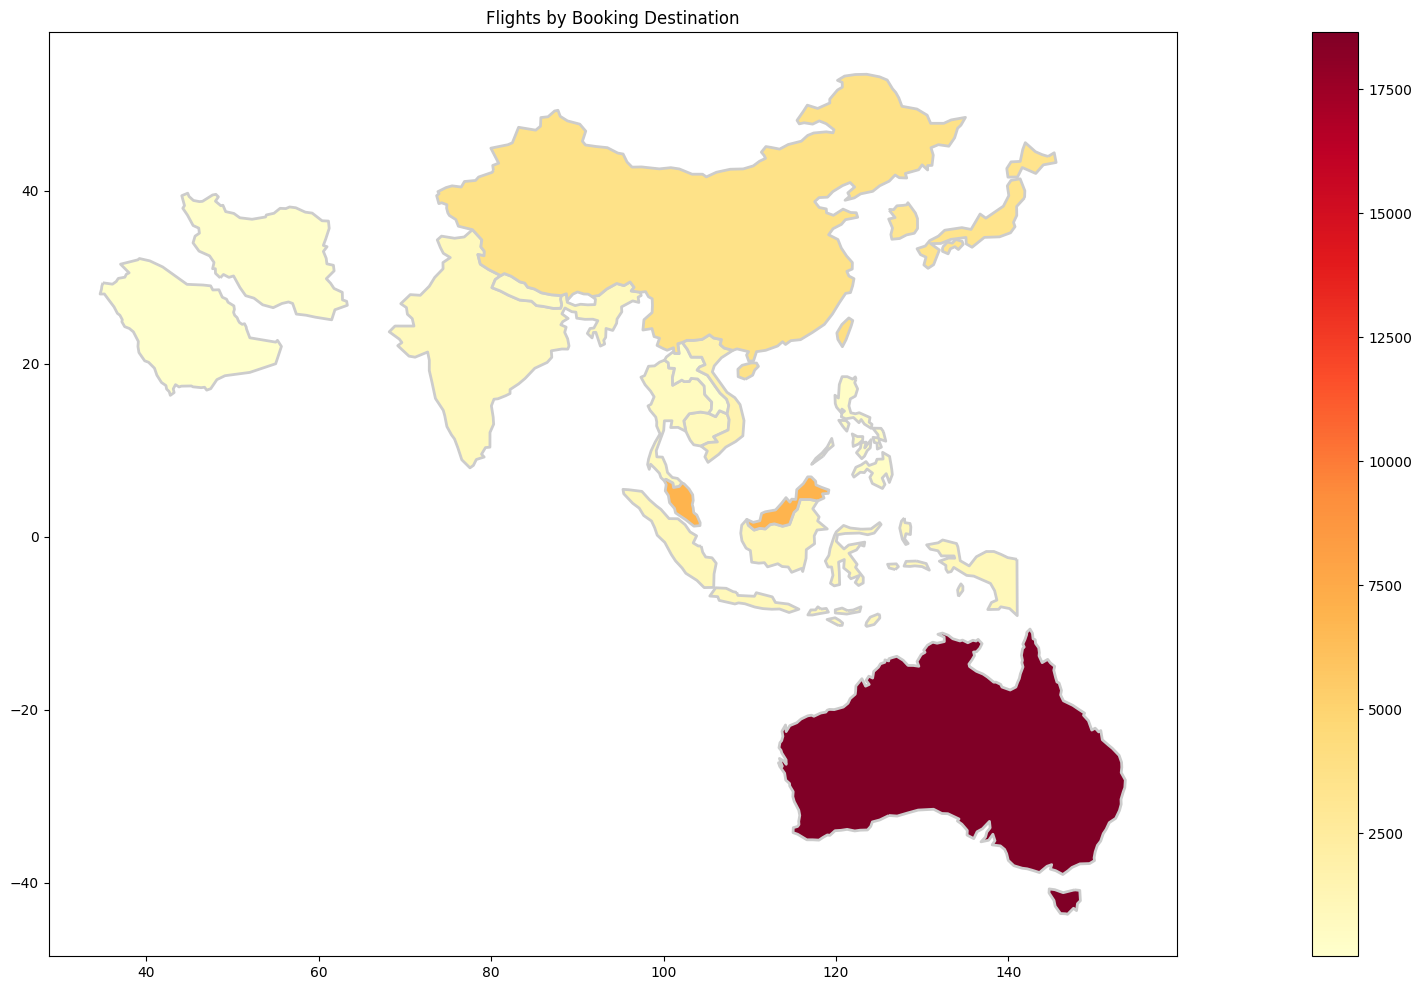

In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_destination'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_destination', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Destination')

plt.show()

# Optional Filter by Country

In [94]:
country_filter = ''

# Booking Origin

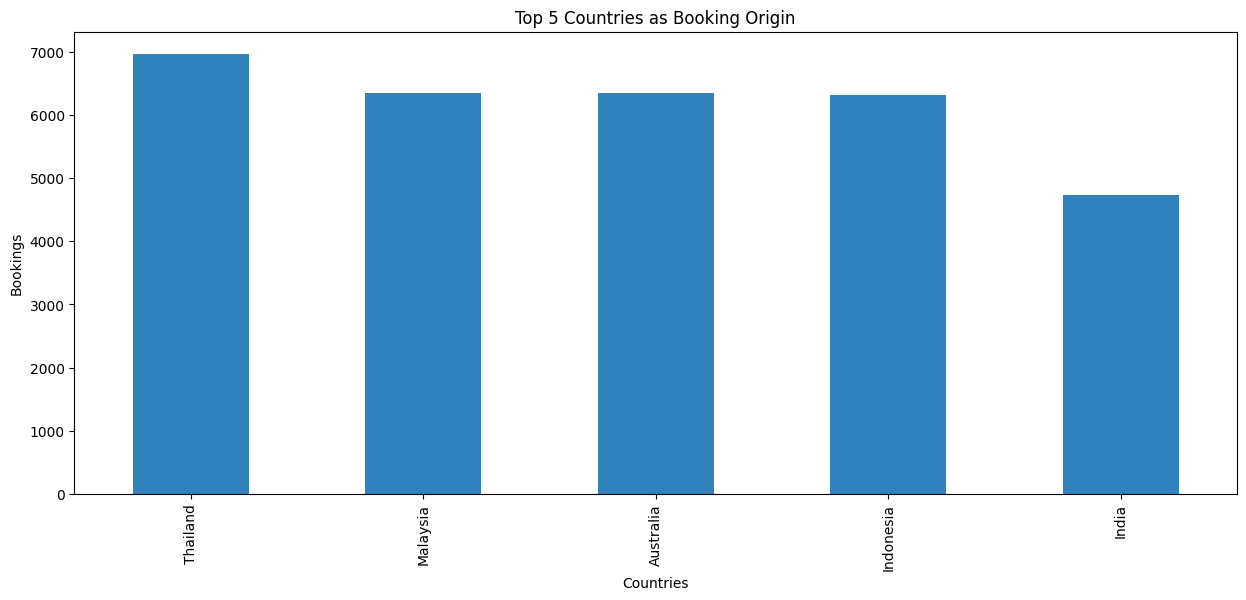

In [95]:
def plot_top_countries_by_booking_origin(df, topx, booking_destination=None):
    if booking_destination:
        value_counts = df[df['booking_destination'] == booking_destination]['booking_origin'].value_counts().head(topx)
        title = f'Top {topx} Countries from Booking Origin to {booking_destination}'
    else:
        value_counts = df['booking_origin'].value_counts().head(topx)
        title = f'Top {topx} Countries as Booking Origin'

    fig, ax = plt.subplots(figsize=(15, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Countries')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()

plot_top_countries_by_booking_origin(df,5,country_filter)


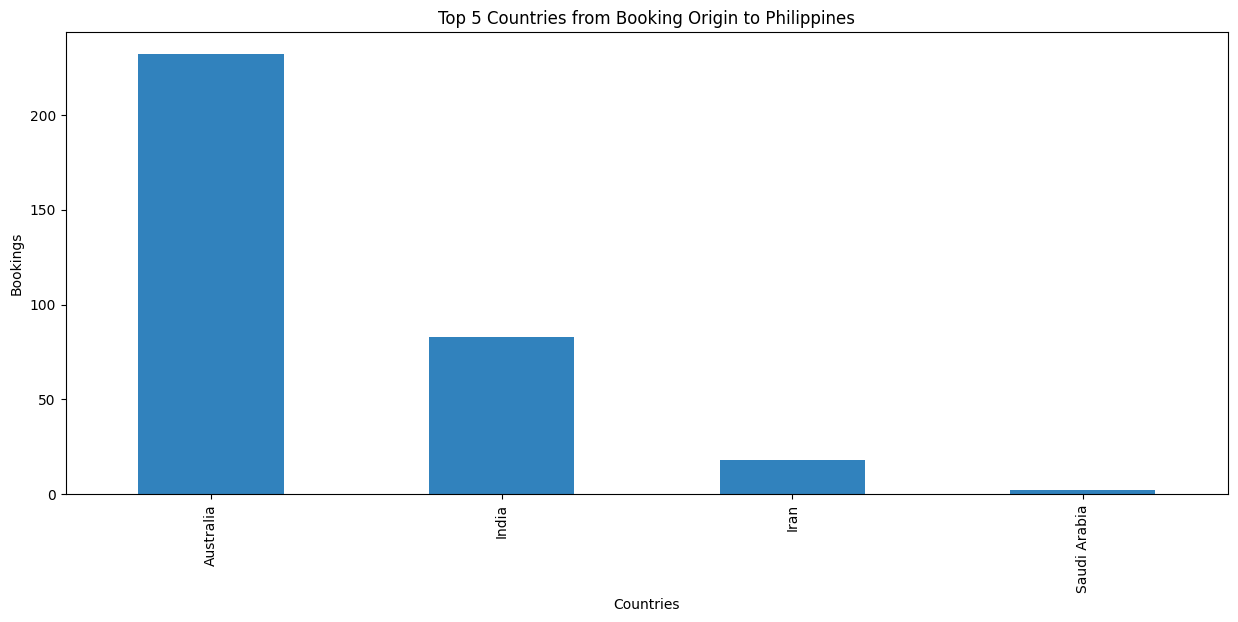

In [58]:

plot_top_countries_by_booking_origin(df,5,'Philippines')


# Booking Destination

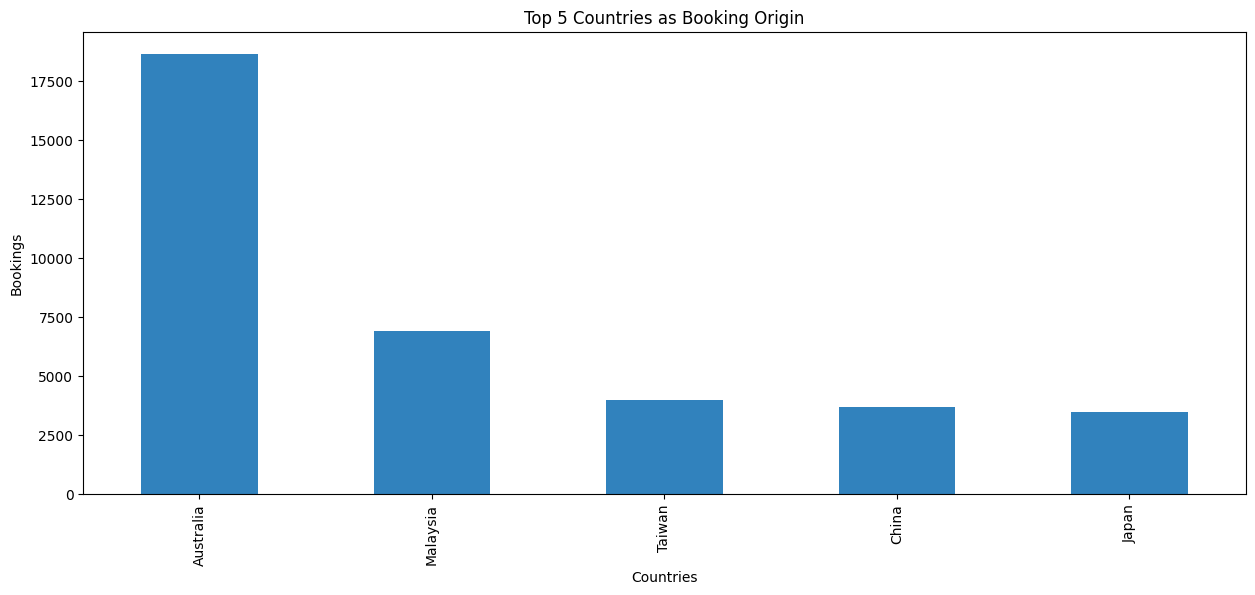

In [56]:
def plot_top_countries_by_booking_destination(df, topx, booking_origin=None):
    if booking_origin:
        value_counts = df[df['booking_origin'] == booking_origin]['booking_destination'].value_counts().head(topx)
        title = f'Top {topx} Countries from {booking_origin} to Booking Destination'
    else:
        value_counts = df['booking_destination'].value_counts().head(topx)
        title = f'Top {topx} Countries as Booking Origin'

    fig, ax = plt.subplots(figsize=(15, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Countries')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()


plot_top_countries_by_booking_destination(df,5)

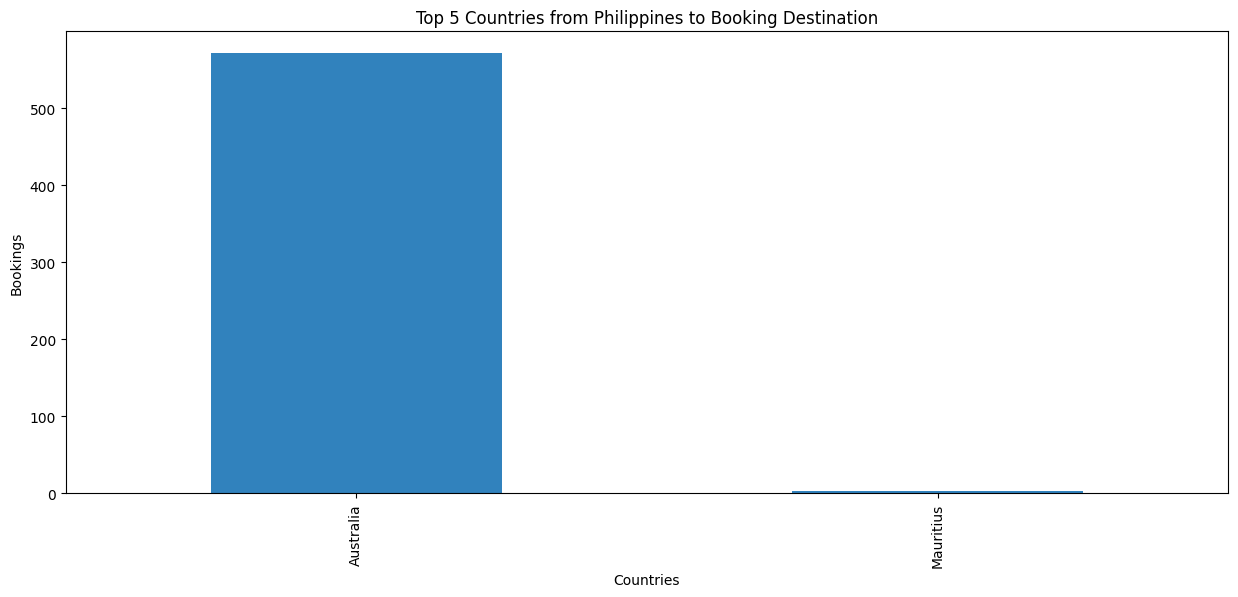

In [59]:
plot_top_countries_by_booking_destination(df,5,'Philippines')


# Routes

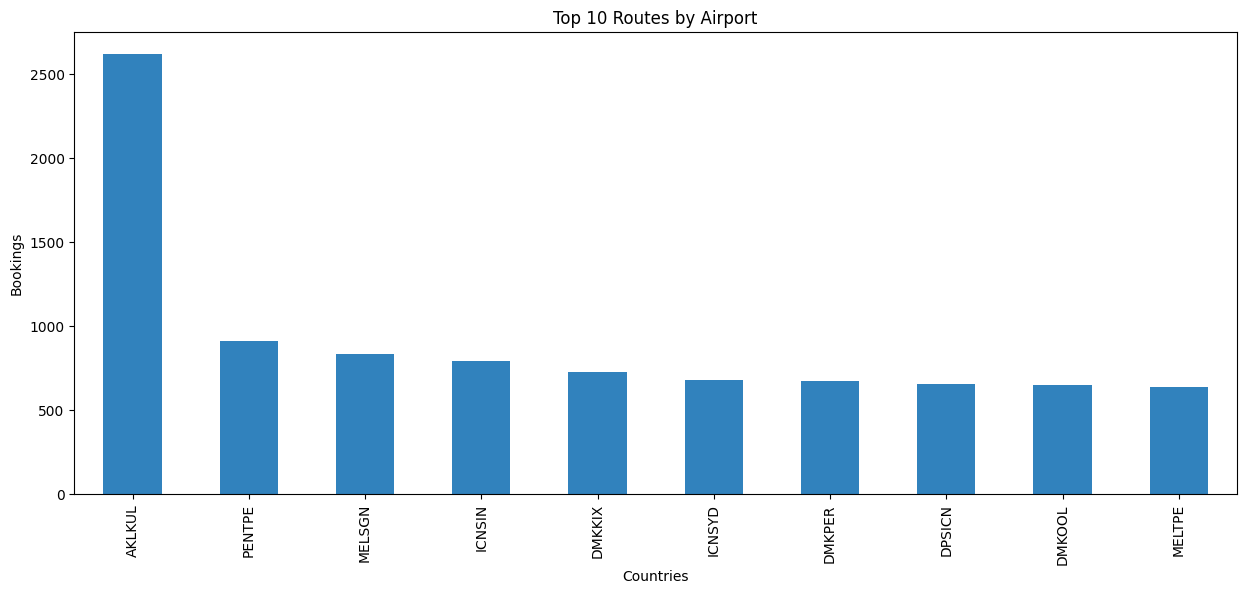

In [10]:
value_counts = df['route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Airport')

# Display the plot
plt.show()

In [66]:
def plot_top_routes_by_country(df, topx, booking_destination=None, booking_origin=None):
    if booking_destination:
        filtered_df = df[df['booking_destination'] == booking_destination]
        title = f'Top {topx} Routes to {booking_destination}'
    elif booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'Top {topx} Routes from {booking_origin}'
    else:
        filtered_df = df.copy()
        title = f'Top {topx} Routes by Country'

    value_counts = filtered_df['country_route'].value_counts().head(topx)

    fig, ax = plt.subplots(figsize=(15, 6))
    value_counts.plot.bar(colormap='tab20c', ax=ax)

    plt.xlabel('Countries')
    plt.ylabel('Bookings')
    plt.title(title)

    # Display the plot
    plt.show()

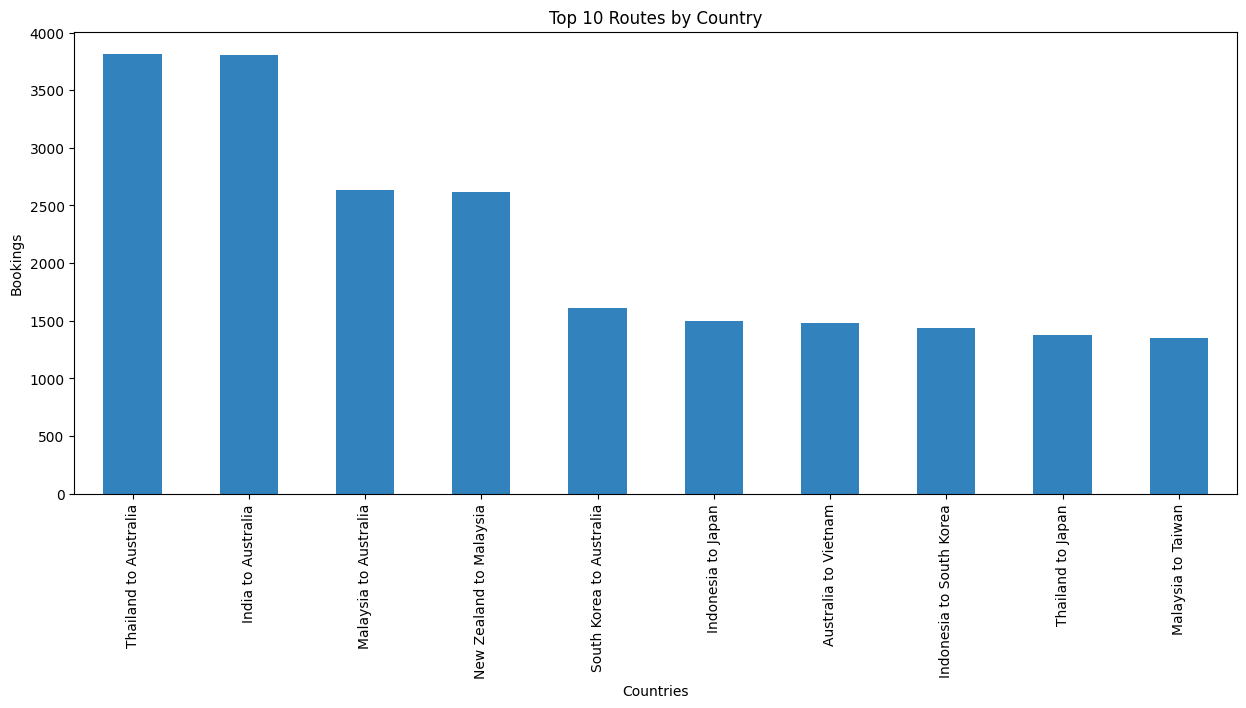

In [96]:
plot_top_routes_by_country(df,10,country_filter)

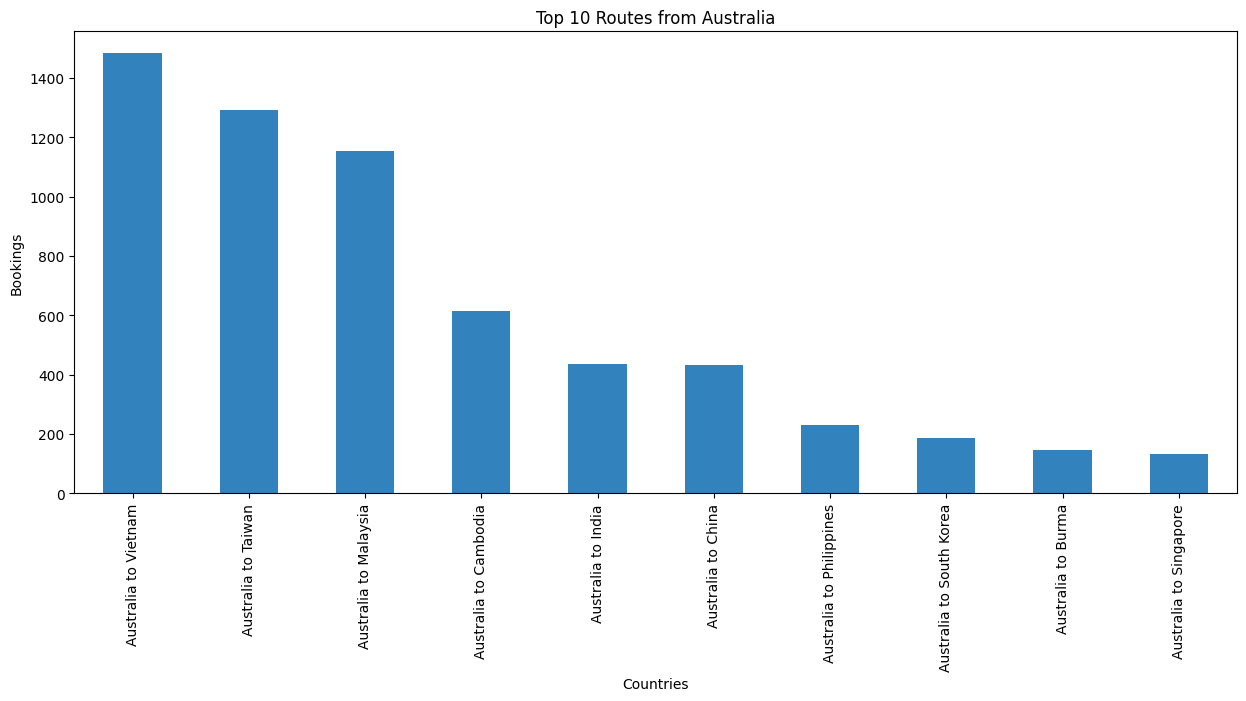

In [67]:
plot_top_routes_by_country(df,10,None,'Australia')

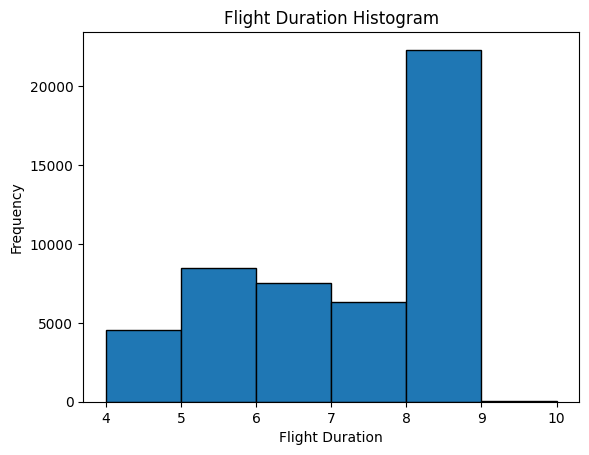

In [97]:
def plot_flight_duration_histogram(df, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'Flight Duration Histogram for {booking_origin}'
    else:
        filtered_df = df.copy()
        title = 'Flight Duration Histogram'

    bin_edges = range(int(min(filtered_df['flight_duration'])), int(max(filtered_df['flight_duration']))+2)
    plt.hist(filtered_df['flight_duration'], bins=bin_edges, edgecolor='black')

    plt.xlabel('Flight Duration')
    plt.ylabel('Frequency')
    plt.title(title)

    # Display the histogram
    plt.show()

plot_flight_duration_histogram(df,country_filter)

# Additional Services

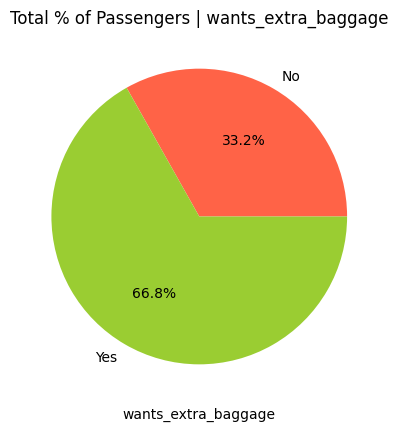

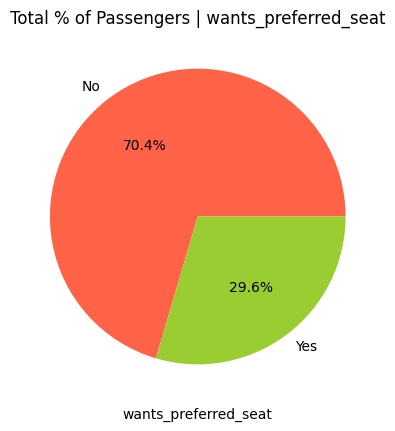

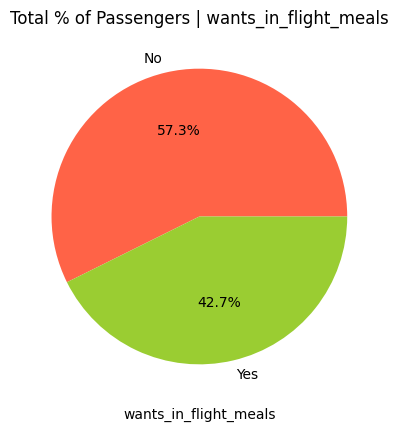

In [98]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

def plot_services_pie_charts(df, services, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title_prefix = f'{booking_origin} | '
    else:
        filtered_df = df.copy()
        title_prefix = ''

    for service in services:
        count = filtered_df[service].value_counts().sort_index()
        plt.pie(count, labels=["No", "Yes"], autopct='%1.1f%%', colors=["tomato", "yellowgreen"])

        plt.xlabel(service)
        plt.title(title_prefix + f"Total % of Passengers | {service}")
        plt.show()

plot_services_pie_charts(df,services,country_filter)

## Wants In Flight Meals

In [80]:
# For binary and continous variable correlation
def capitalize_variable(variable):
    return variable.replace('_', ' ').capitalize()

def plot_bi_serial_correlation(df, binary, continuous, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | {capitalize_variable(binary)} vs {capitalize_variable(continuous)}'
    else:
        filtered_df = df.copy()
        title = f'{capitalize_variable(binary)} vs {capitalize_variable(continuous)}'

    # Calculate the point-biserial correlation
    correlation_coefficient, p_value = stats.pointbiserialr(filtered_df[binary], filtered_df[continuous])

    # Create a scatter plot of the data
    plt.scatter(filtered_df[binary], filtered_df[continuous])

    # Add labels and title
    plt.xlabel({capitalize_variable(binary)})
    plt.ylabel(capitalize_variable(continuous))
    plt.title(f'{title} | Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

    # Display the plot
    plt.show()

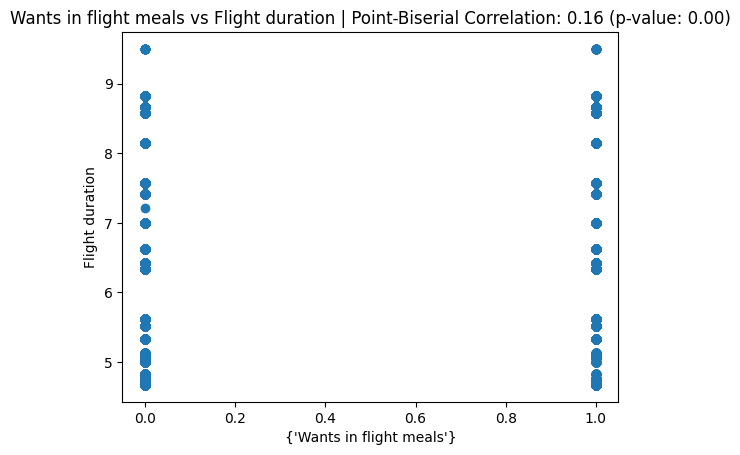

In [99]:
plot_bi_serial_correlation(df, 'wants_in_flight_meals', 'flight_duration', country_filter)

#weak correlation
#can also be explained bc the min flight length is 4 hrs, which is relatively long. it might have more correlation if we could compare to flights shorter in length (1-2 hrs)
#https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php

## Extra Baggage

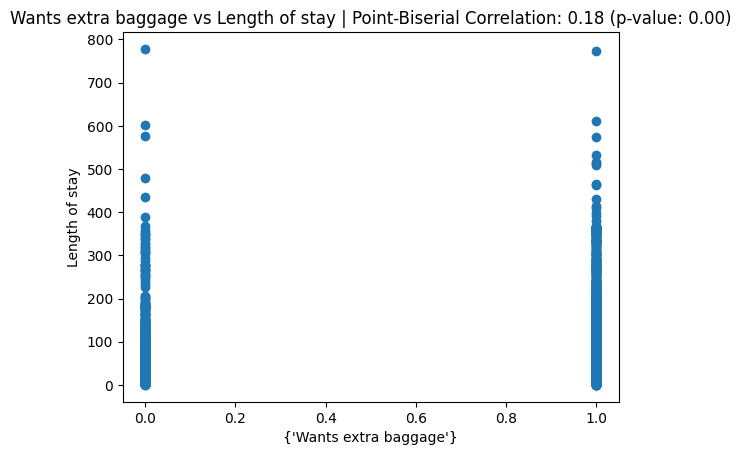

In [100]:
plot_bi_serial_correlation(df, 'wants_extra_baggage', 'length_of_stay', country_filter)

## Preferred Seat

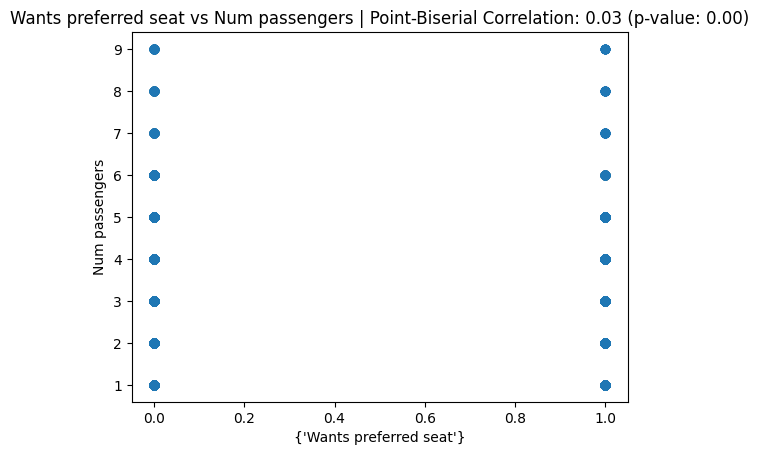

In [105]:
plot_bi_serial_correlation(df, 'wants_preferred_seat', 'num_passengers', country_filter)
#data is stacked on top of each other since num_passengers is in integers

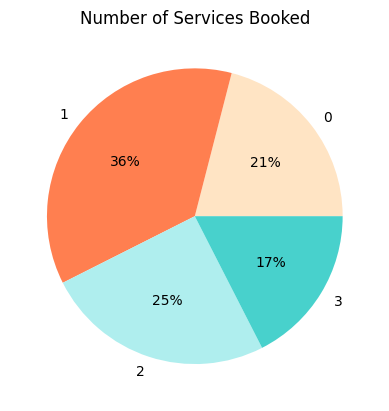

In [109]:
# By Number of Services Booked
df['total_services'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

def plot_number_of_services_booked(df, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Number of Services Booked'
    else:
        filtered_df = df.copy()
        title = 'Number of Services Booked'

    value_counts = filtered_df['total_services'].value_counts().reset_index()
    value_counts_sorted = value_counts.sort_values('index')

    plt.pie(value_counts_sorted['total_services'], labels=value_counts_sorted['index'], autopct='%1.0f%%', colors=['bisque', 'coral', 'paleturquoise', 'mediumturquoise'])
    plt.title(title)

    plt.show()

plot_number_of_services_booked(df)

# Passengers are more likely to purchase 2 or more services
# Recommendation: Bundle packages at a slight discount to incentivize people to book more services
# Next question: Which services?

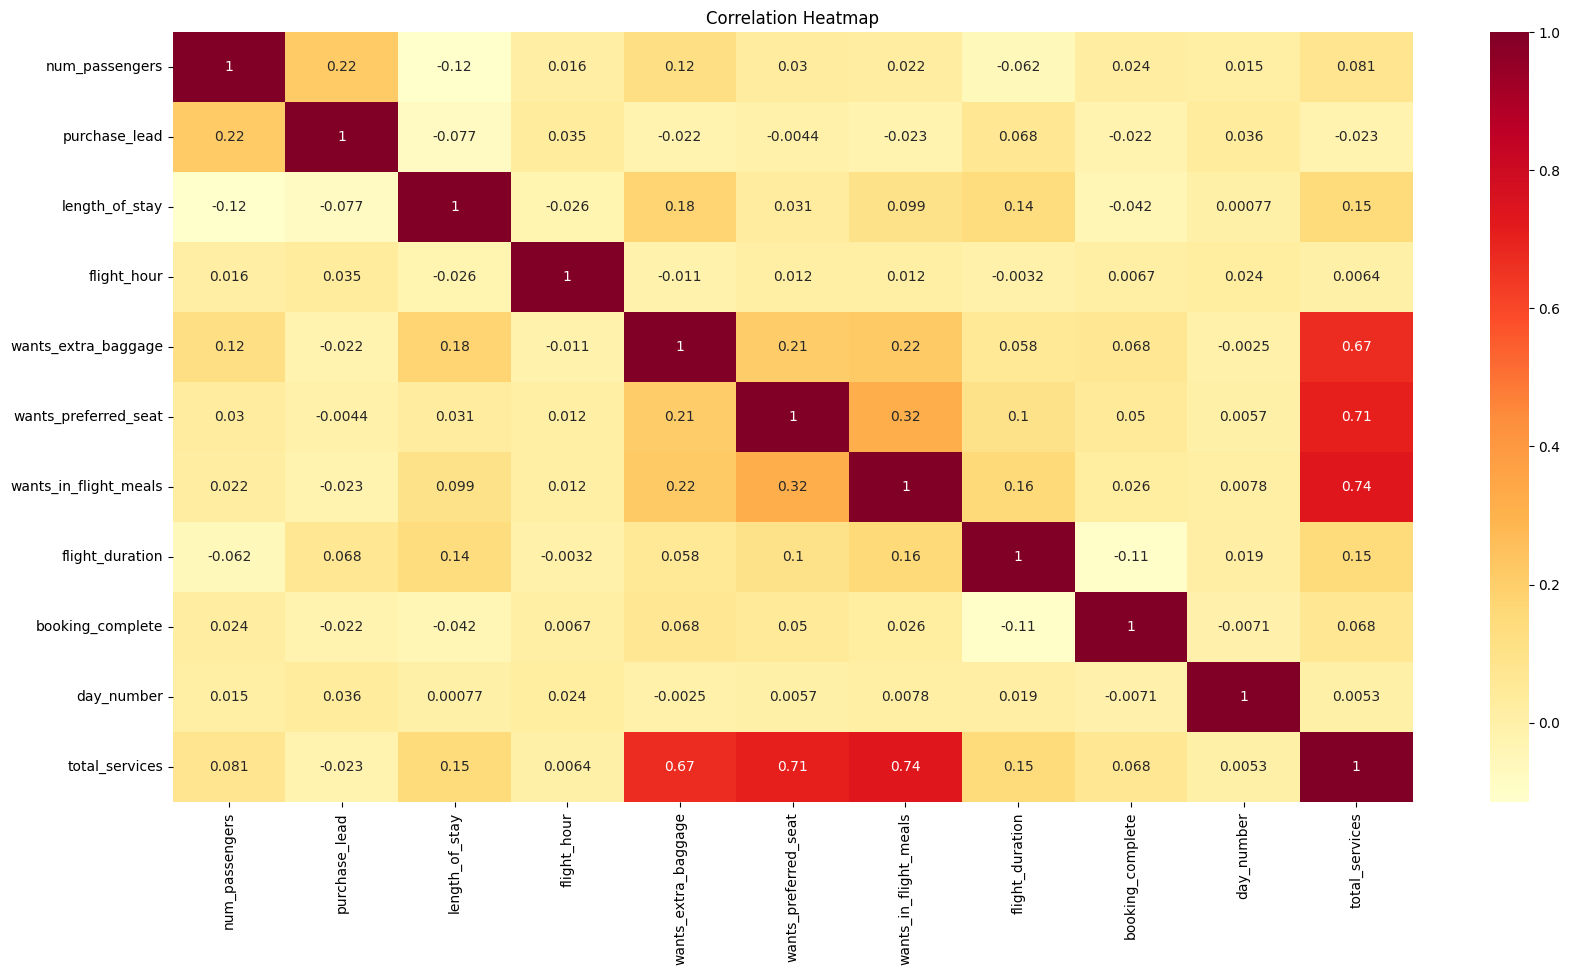

In [112]:

def plot_correlation_heatmap(df, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | Correlation Heatmap'
    else:
        filtered_df = df.copy()
        title = 'Correlation Heatmap'

    correlation_matrix = filtered_df.corr()

    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd')
    plt.title(title)
    plt.show()

plot_correlation_heatmap(df,country_filter)
# Correlation between all three factors (especially flight meals and preferred seat (0.32))
# We can disregard Total Services since it is the sum of all three of the correlated variables

In [102]:
def calculate_correlation(df, service1, service2):
    correlation = df[service1].corr(df[service2])
    return(f"Correlation between {service1} and {service2}: {correlation}")

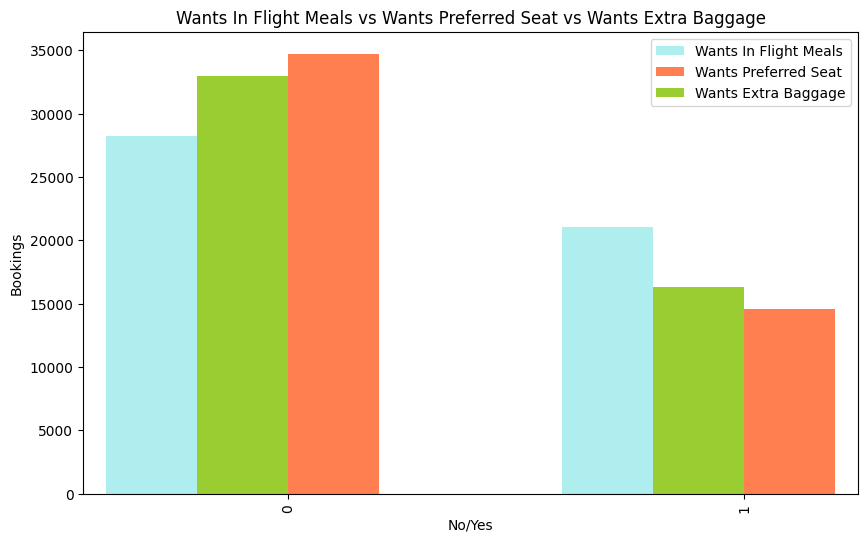

In [116]:
import matplotlib.pyplot as plt

seat = df['wants_preferred_seat'].value_counts()
meals = df['wants_in_flight_meals'].value_counts()
baggage = df['wants_extra_baggage'].value_counts()

# Reduce the bar width to lessen the space between bars
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

meals.plot.bar(position=2, width=bar_width, color='paleturquoise', label='Wants In Flight Meals', ax=ax)
seat.plot.bar(position=0, width=bar_width, color='coral', label='Wants Preferred Seat', ax=ax)
baggage.plot.bar(position=1, width=bar_width, color='yellowgreen', label='Wants Extra Baggage', ax=ax)

# Customize the plot
plt.xlabel('No/Yes')
plt.ylabel('Bookings')
plt.title('Wants In Flight Meals vs Wants Preferred Seat vs Wants Extra Baggage')
plt.xticks(range(len(meals)), meals.index)

# Add a legend
ax.legend()

# Display the plot
plt.show()

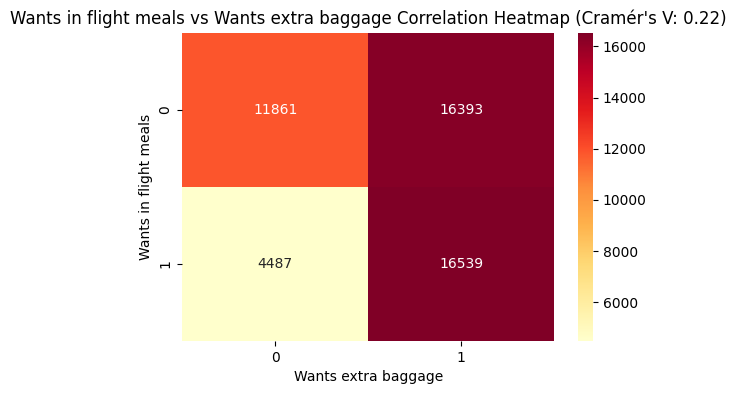

In [126]:
def binary_variable_correlation_heatmap(df, binary_var_1, binary_var_2, booking_origin=None):
    if booking_origin:
        filtered_df = df[df['booking_origin'] == booking_origin]
        title = f'{booking_origin} | {capitalize_variable(binary_var_1)} vs {capitalize_variable(binary_var_2)} Correlation Heatmap'
    else:
        filtered_df = df.copy()
        title = f'{capitalize_variable(binary_var_1)} vs {capitalize_variable(binary_var_2)} Correlation Heatmap'

    # Create a cross-tabulation of the two binary variables
    cross_tab = pd.crosstab(filtered_df[binary_var_1], filtered_df[binary_var_2])

    # Calculate the correlation coefficient (Cramér's V) for binary variables
    def cramers_v(table):
        chi2 = stats.chi2_contingency(table)[0]
        n = table.sum().sum()
        phi2 = chi2 / n
        r, k = table.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
        rcorr = r - ((r-1)**2) / (n-1)
        kcorr = k - ((k-1)**2) / (n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    correlation_coefficient = cramers_v(cross_tab)

    # Create a heatmap of the cross-tabulation
    plt.figure(figsize=(6, 4))
    sns.heatmap(cross_tab, annot=True, cmap='YlOrRd', fmt='d')
    plt.title(f'{title} (Cramér\'s V: {correlation_coefficient:.2f})')
    plt.xlabel(capitalize_variable(binary_var_2))
    plt.ylabel(capitalize_variable(binary_var_1))
    plt.show()

binary_variable_correlation_heatmap(df, 'wants_in_flight_meals','wants_extra_baggage')

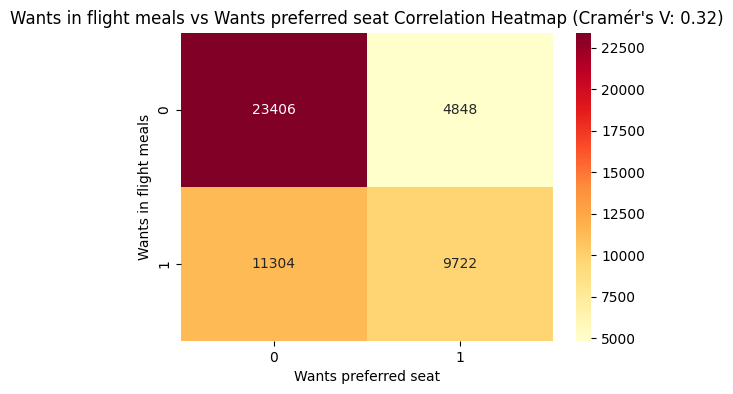

In [128]:
binary_variable_correlation_heatmap(df, 'wants_in_flight_meals','wants_preferred_seat')

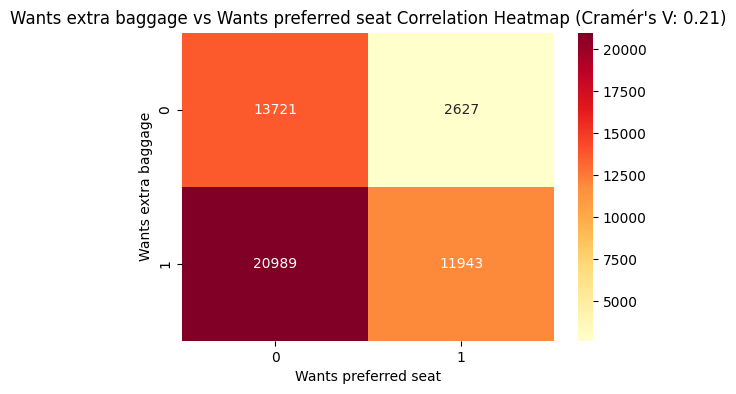

In [129]:
binary_variable_correlation_heatmap(df, 'wants_extra_baggage','wants_preferred_seat')